In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
data = pd.read_csv('housing.csv',delim_whitespace=True,names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
)
print(data.shape)
data.head()
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


(506, 14)


In [105]:
CRIM = data['CRIM'].values#try to do with slicing
ZN = data['ZN'].values
INDUS= data['INDUS'].values
CHAS= data['CHAS'].values
NOX= data['INDUS'].values
RM= data['RM'].values
AGE= data['AGE'].values
DIS= data['DIS'].values
RAD= data['RAD'].values
TAX= data['TAX'].values
PTRATIO= data['PTRATIO'].values
B= data['B'].values
LSTAT= data['LSTAT'].values
MEDV= data['MEDV'].values

m = len(CRIM)
x0 = np.ones(m)

X = np.array([ x0,CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT]).T
Y = np.array(MEDV)

In [106]:
X = (data - data.mean())/(data.max()-data.min())


In [107]:
m = len(CRIM)
x0 = np.ones(m)
X = np.array([x0,CRIM,
 INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, ZN]).T
B = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])#initialise weights
alpha = 0.0000001
d = np.dtype(int)


In [108]:
data.shape
Y.shape
B

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [109]:
Y.shape

(506,)

In [110]:
def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [111]:
inital_cost = cost_function(X, Y, B)
print(inital_cost)

np.resize(X, (506,14))

296.073458498


array([[  1.00000000e+00,   6.32000000e-03,   2.31000000e+00, ...,
          3.96900000e+02,   4.98000000e+00,   1.80000000e+01],
       [  1.00000000e+00,   2.73100000e-02,   7.07000000e+00, ...,
          3.96900000e+02,   9.14000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   2.72900000e-02,   7.07000000e+00, ...,
          3.92830000e+02,   4.03000000e+00,   0.00000000e+00],
       ..., 
       [  1.00000000e+00,   6.07600000e-02,   1.19300000e+01, ...,
          3.96900000e+02,   5.64000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   1.09590000e-01,   1.19300000e+01, ...,
          3.93450000e+02,   6.48000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   4.74100000e-02,   1.19300000e+01, ...,
          3.96900000e+02,   7.88000000e+00,   0.00000000e+00]])

In [112]:
def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations #what is this#ans:initialise cost history value
    m = len(Y)
    
    for iteration in range(iterations):
      
        h = X.dot(B)
        
        loss = h - Y
        
        gradient = X.T.dot(loss) / m
        
        B = B - alpha * gradient
        
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost
        
    return B, cost_history

40.5253661032


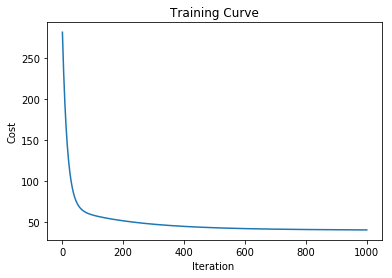

In [115]:
newB, cost_history = gradient_descent(X, Y, B, alpha, 1000)#nan error is shown only for high values of iterations 
print(cost_history[-1])

plt.plot(range(1, len(cost_history)+1), cost_history)
plt.title("Training Curve")
plt.xlabel("Iteration ")
plt.ylabel("Cost")
plt.show()



In [114]:
#train_x = data.drop(['MEDV'], axis = 1)split data